In [1]:
# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Upload your file
from google.colab import files
uploaded = files.upload()

# 📂 Load the dataset (replace with your file name if needed)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 📊 View first few rows
print("🔹 First 5 rows:")
df.head()


Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv
🔹 First 5 rows:


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
# 🔍 Check column names in your dataset
print("📦 Column names:")
print(df.columns)


📦 Column names:
Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [7]:
# 🔍 Basic info
print("🔹 Dataset shape:", df.shape)
print("🔹 Columns:", df.columns)
print("\n🔹 Missing values:\n", df.isnull().sum())
print("\n🔹 Data types:\n", df.dtypes)

# 🧹 Cleaning: Remove duplicates
df.drop_duplicates(inplace=True)

# 📊 Summary stats
print("\n📊 Summary statistics:\n", df.describe())

# 📈 Top 10 products by sales
top_products = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
print("\n🏆 Top 10 Products by Sales:\n", top_products)

# 📍 Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\n🌎 Top 10 Sub Category by sales:\n", top_products)


🔹 Dataset shape: (9994, 11)
🔹 Columns: Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

🔹 Missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

🔹 Data types:
 Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

📊 Summary statistics:
              Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000

/tmp/ipython-input-8-3253649660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


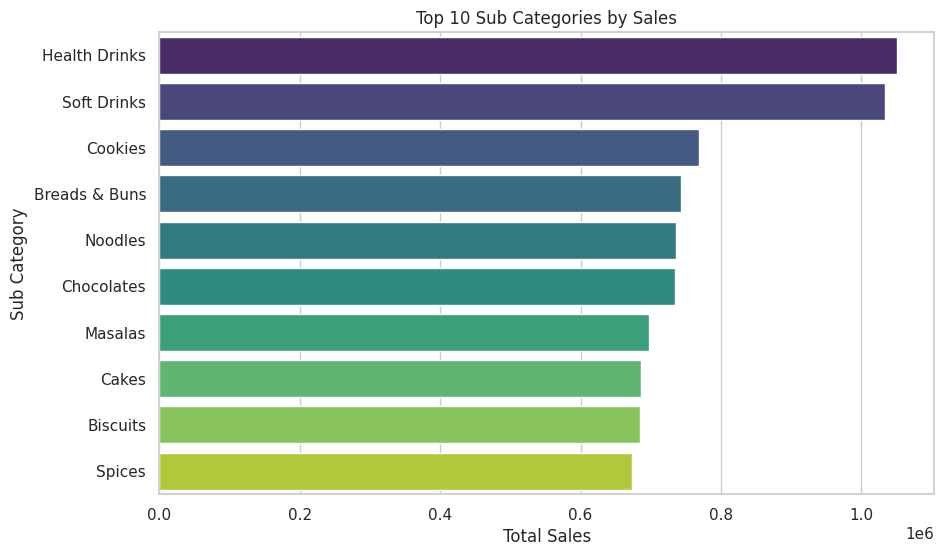

In [8]:
# 🎨 Set Seaborn style
import seaborn as sns
sns.set(style="whitegrid")

# 📊 Bar chart: Top 10 Sub Categories by Sales
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Sub Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub Category")
plt.show()


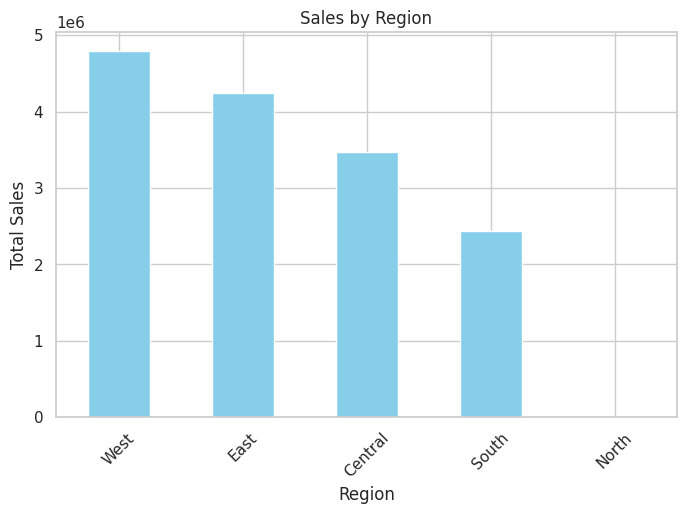

In [9]:
# 📊 Bar chart: Sales by Region
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


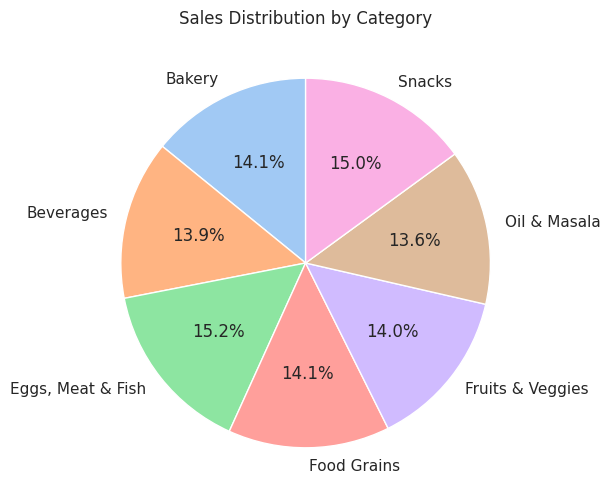

In [10]:
# 🥧 Pie chart: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Category")
plt.ylabel("")  # Hide y-label
plt.show()


In [14]:
# 🕒 Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])


ValueError: time data "4/15/2018" doesn't match format "%m-%d-%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [15]:
# 🧹 Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [16]:
# 🕒 Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


/tmp/ipython-input-17-2727340164.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


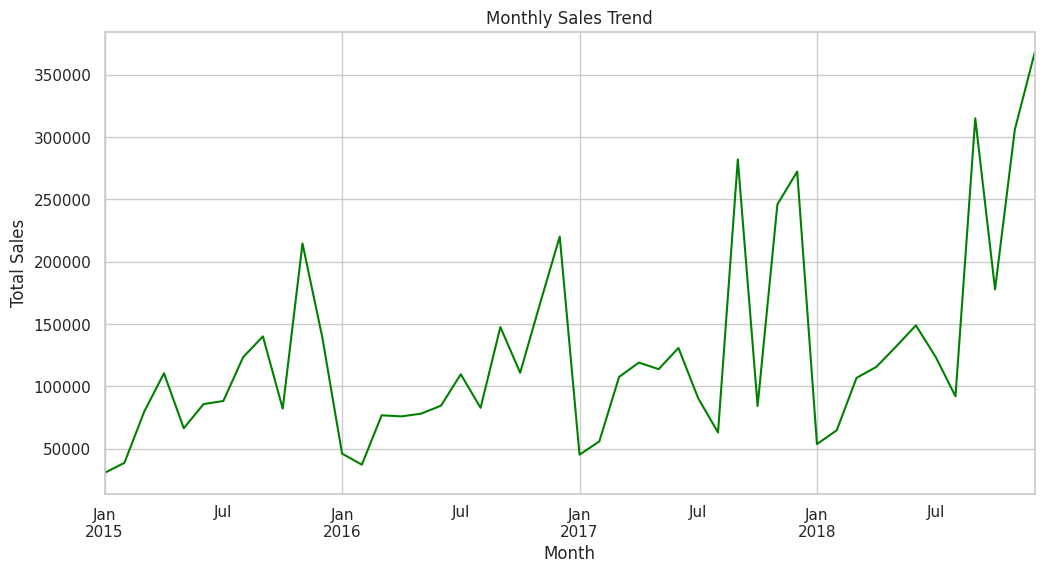

In [17]:
# 📈 Line chart: Monthly Sales Trend
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()
